In [1]:
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os

gfz = Client('GFZ')
gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
starttime = UTCDateTime(2015,8,1)
endtime = UTCDateTime(2015,8,5)
sc.download_waveforms_mdl(starttime,endtime,clients=[gfz], network='D0', station='*')

FDSNException: Bad request. If you think your request was valid please contact the developers.
Detailed response of server:

Error 400: Bad Request
token is expired
Usage details are available from /fdsnws/dataselect/1/
Request:
/fdsnws/dataselect/1/auth
Request Submitted:
2021-05-11T13:07:35.37769
Service Version:
1.1.0

In [3]:
# Try to read in the files written in the section above
sc.read_only=True
st = sc.get_waveforms('D0', 'BDR', '*', '*', UTCDateTime(0), UTCDateTime(2100,1,1),_check_times=False)
print(st)

Loading locally ... 

In [3]:
from miic3.trace_data.preprocess import Preprocessor
from miic3.trace_data.waveform import Store_Client
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import os
import time

gfz = Client('GFZ')
#gfz.set_eida_token('/home/pm/.eidatoken')
root = '/home/pm/Documents/PhD/testdata'
sc = Store_Client(gfz,root,read_only=False)
c = Preprocessor(sc, sampling_rate=25, outfolder='testnb_preprocessed_dailypp')


In [4]:
import time
import os
#c.preprocess_bulk(network='D0', backend='joblib', n_cpus=8)
c.preprocess_bulk(network='D0', statlist=['BZG', 'ESO', 'KBG','KIR'], backend='joblib', n_cpus=8)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done   2 out of   4 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   4 out of   4 | elapsed:    5.1s finished


In [6]:
import scipy.io
import os
import numpy as np
fname = "/home/pm/Documents/PhD/testdata/miic_old/corr/2015/213/20150801T0{n}0001000000Z_trace_D0D0.BZGESO.0000.HHZHHZ.mat"
A = np.zeros((9,5001))
for n in range(0,10):
    mat = scipy.io.loadmat(fname.format(n=n))
    A[n-1,:] = mat['corr_trace'][:,0]
#print(A)

(5001, 1)
         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-01T00:00:01.000000Z
         endtime: 2015-08-01T00:03:21.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-01T01:00:00.960000Z
      corr_start: 2015-08-01T00:00:01.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 23, 59, 59)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', "ObsPy 1.2.2: filter(options={'freqmin': 2, 'freqmax': 4}::type='bandpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 1, 0, 0, 960000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime

Text(0.5, 1.0, 'difference IR vs no IR (24h stack)')

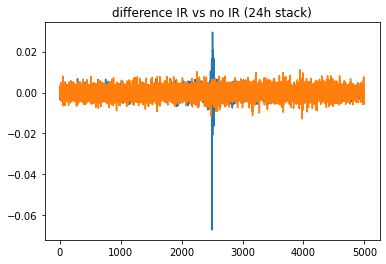

In [8]:

import matplotlib.pyplot as plt
import numpy as np
print(mat['corr_trace'].shape)
#plt.plot(np.sum(mat['corr_data'],axis=0))
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='subdivision')
import matplotlib.pyplot as plt
#print(cst[1].stats)
l = []
for tr in cst:
    l.append(tr.data)
noIR_mean = np.sum(l, axis=0)
print(cst[0].stats)
plt.plot(cst[0].data)
plt.plot(A[0,])
#plt.plot(noIR_mean)
#plt.plot(A.sum(axis=0))
#plt.plot((A.sum(axis=0)-noIR_mean))
plt.title('difference IR vs no IR (24h stack)')
#plt.title('Daily Stacks')
#plt.legend(['With IR (old miic)', 'IR removed (new miic)'])
#cst[2].plot()


         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-01T00:00:30.000000Z
         endtime: 2015-08-01T00:03:50.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-01T01:00:29.960000Z
      corr_start: 2015-08-01T00:00:30.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 2, 0, 0, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', "ObsPy 1.2.2: filter(options={'freqmin': 2, 'freqmax': 4}::type='bandpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 1, 0, 29, 960000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1,

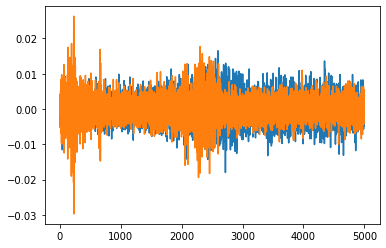

In [3]:
# Comparison hourly processed vs daily (concerning the instrument response removal)
import matplotlib.pyplot as plt
import numpy as np
#plt.plot(np.sum(mat['corr_data'],axis=0))
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='subdivision')
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-ESO.h5') as cdb:
    cstd = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='subdivision')

#plt.plot(cst[3].data)
plt.plot(cstd[3].data)
plt.plot(cst[1].data-cstd[1].data)
print(cst[0].stats)
print(cstd[0].stats)

In [3]:
import scipy.io
import os
mat = scipy.io.loadmat('/home/pm/Documents/PhD/testdata/miic_old/corr/2015/213/20150801T010001000000Z_trace_D0D0.BZGESO.0000.HHZHHZ.mat')

In [6]:
print(mat['corr_trace'])
print(mat.keys())
print(mat['stats_tr1'])

[[ 0.00315474]
 [-0.00078263]
 [-0.0046444 ]
 ..., 
 [ 0.00388198]
 [-0.00019388]
 [-0.00590571]]
dict_keys(['__header__', '__version__', '__globals__', 'corr_trace', 'stats', 'stats_tr2', 'stats_tr1'])
[[ (array([[ 1150.]]), array([[ 25.]]), array(['2015-08-01T02:00:00.960000Z'],
      dtype='<U27'), array([[ 55.9399]]), array(['D0'],
      dtype='<U2'), array([[ 160.6961]]), array(['BZG'],
      dtype='<U3'), array(['00'],
      dtype='<U2'), array(['2015-08-01T01:00:01.000000Z'],
      dtype='<U27'), array([[90000]]), array(['HHZ'],
      dtype='<U3'))]]


(5001, 1)


Text(0.5, 1.0, 'with IR (old miic)')

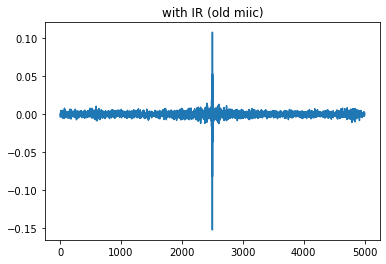

In [2]:

import matplotlib.pyplot as plt
import numpy as np
print(mat['corr_trace'].shape)
#plt.plot(np.sum(mat['corr_data'],axis=0))
plt.plot(mat['corr_trace'])
#print(len(np.sum(mat['corr_data'],axis=0)))
#print(mat['stats'])
plt.title('with IR (old miic)')


(5001,)
         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-01T01:00:01.000000Z
         endtime: 2015-08-01T01:03:21.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-01T02:00:00.960000Z
      corr_start: 2015-08-01T01:00:01.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 23, 59, 59)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', "ObsPy 1.2.2: filter(options={'freqmin': 2, 'freqmax': 4}::type='bandpass')", 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 2, 0, 0, 960000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2

Text(0.5, 1.0, 'difference IR vs no IR')

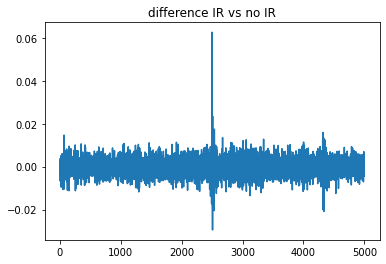

In [19]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO',channel='HHZ-HHZ', tag='subdivision')
import matplotlib.pyplot as plt
#plt.plot(cst[1].data)
#print(cst[1].stats)
no_prepro = cst[0].data #/cst[1].data.max()
print(no_prepro.shape)
print(cst[1].stats)
#plt.plot(mat['corr_trace'])
#plt.plot(no_prepro)
#plt.legend(['With Instrument response (old miic)', 'IR removed (new miic)'])
plt.plot((mat['corr_trace'][:,0]-no_prepro))
plt.title('difference IR vs no IR')

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


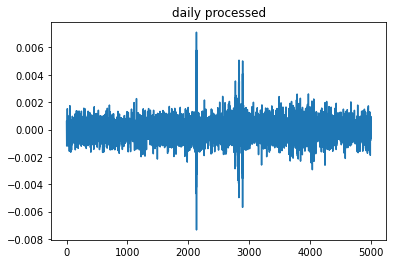

In [11]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_dailypp/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('daily processed')
#print(cst[1].stats)
daily = cst[1].data/np.linalg.norm(cst[1].data)

         network: D0-D0
         station: BZG-ESO
        location: 00-00
         channel: HHZ-HHZ
       starttime: 2015-08-01T00:00:01.000000Z
         endtime: 2015-08-01T00:03:21.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 5001
           calib: 1.0
         _format: hdf5
              az: 270.436284634
             baz: 88.7783288592
        corr_end: 2015-08-01T01:00:01.000000Z
      corr_start: 2015-08-01T00:00:01.000000Z
            dist: 125.07133666
         end_lag: 100.04
            evel: 490.0
            evla: 55.9322
            evlo: 158.6948
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 2, 0, 0, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', 'ObsPy 1.2.2: trim(endtime=UTCDateTime(2015, 8, 1, 1, 0, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2015, 8, 1, 0, 0, 1))', "ObsPy 1.2.2: taper(max_length=None::max_percentage=0.05::side='both'::typ

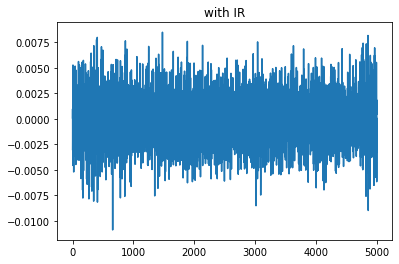

In [23]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_wir/D0-D0.BZG-ESO.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-ESO', channel='HHZ-HHZ', tag='recombined')
    #print(cst)
import matplotlib.pyplot as plt
plt.plot(cst[0].data)
print(cst[0].stats)
plt.title('with IR')
#print(cst[1].stats)
wir = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


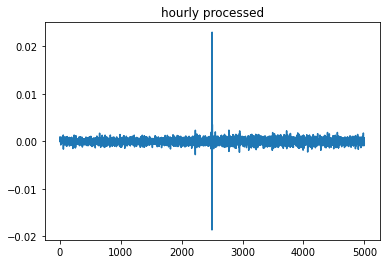

In [43]:
from miic3.db.corr_hdf5 import CorrelationDataBase
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('hourly processed')
#print(cst[1].stats)
hourly = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


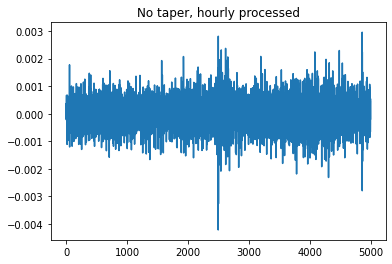

In [44]:

with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_no_taper/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('No taper, hourly processed')
#print(cst[1].stats)
hourly_nt = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


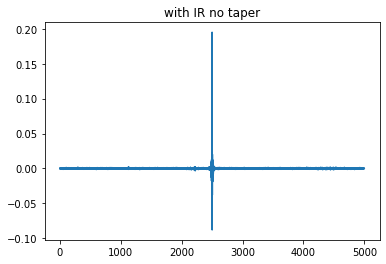

In [45]:
with CorrelationDataBase('/home/pm/Documents/PhD/testdata/corr_wir_no_taper/D0-D0.BZG-KBG.h5') as cdb:
    cst = cdb.get_data('D0-D0', 'BZG-KBG',channel='HHZ-HHZ', tag='recombined')
import matplotlib.pyplot as plt
plt.plot(cst[1].data)
plt.title('with IR no taper')
#print(cst[1].stats)
wir_nt = cst[1].data/np.linalg.norm(cst[1].data)

/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imagi

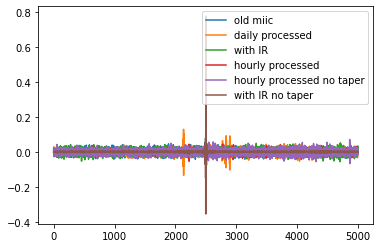

In [46]:
plt.plot(old)
plt.plot(daily)
plt.plot(wir)
plt.plot(hourly)
plt.plot(hourly_nt)
plt.plot(wir_nt)
plt.legend(['old miic', 'daily processed', 'with IR', 'hourly processed', 'hourly processed no taper', 'with IR no taper'])

1 Trace(s) in Stream:
D0.BDR.01.SHE | 2015-08-01T03:19:43.335000Z - 2015-08-02T00:00:00.000000Z | 200.0 Hz, 14883334 samples (masked) 1 Trace(s) in Stream:
D0.BDR.01.SHE | 2015-08-01T03:19:43.335000Z - 2015-08-02T00:00:00.000000Z | 200.0 Hz, 14883334 samples


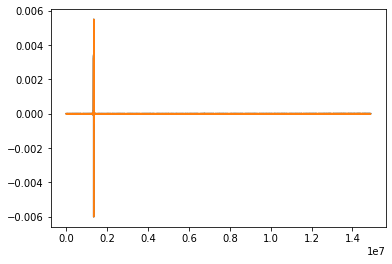

In [18]:
from obspy import read, Stream, read_inventory
import time
st = Stream(read('/home/pm/Documents/PhD/testdata/2015/D0/BDR/SHE.D/D0.BDR.01.SHE.D.2015.213')[3])
inv = read_inventory('/home/pm/Documents/PhD/testdata/inventory/inventory.xml')
# st.decimate(5)
st.attach_response(inv)
# st.detrend()
st_whole = st.copy()
st_whole.remove_response()
st_parts = Stream()
for st_part in st[0].slide(3600/.9,3600, include_partial_windows=True):
    delta = (st_part.stats.endtime-st_part.stats.starttime)*0.05
    st_parts.append((st_part.remove_response(taper_fraction=0.05)))
for ii, tr in enumerate(st_parts):
    delta = (tr.stats.endtime-tr.stats.starttime)*0.05
    if ii==0:
        tr.slice(starttime=st_part.stats.starttime, endtime=st_part.stats.endtime-2*delta)
    elif tr.stats.endtime == st_parts[-1].stats.endtime:
        continue
        #tr.slice(starttime=st_part.stats.starttime+delta, endtime=st_part.stats.endtime)
    else:
        tr.slice(starttime=st_part.stats.starttime+delta, endtime=st_part.stats.endtime-delta)
st_parts.merge()
print(st_parts,st_whole)
import matplotlib.pyplot as plt
x = st_parts[0].data-st_whole[0].data
#plt.plot(st_whole[0].data-st_parts[0].data)
plt.plot(st_parts[0].data)
plt.plot(st_whole[0].data)

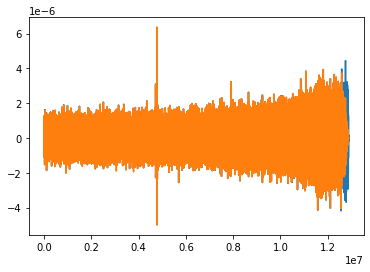

In [19]:
plt.plot(st_parts[0].data[int(2e6):])
plt.plot(st_whole[0].data[int(2e6):])

In [4]:
from obspy import Stream, Trace
import numpy as np
tr = Trace(np.array([0]))
tr1 = Trace(np.array([0, 1]))
tr2 = Trace(np.array([0,1,2]))
st = Stream([tr, tr1, tr2])
st.sort(keys=['npts'])
print(st[-1])

... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.000000Z | 1.0 Hz, 3 samples


In [5]:
from obspy import read
st = read()
print(st[0])

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


In [6]:

from obspy import UTCDateTime
import numpy as np
np.arange(UTCDateTime(500).timestamp, UTCDateTime(700).timestamp, 3)

array([ 500.,  503.,  506.,  509.,  512.,  515.,  518.,  521.,  524.,
        527.,  530.,  533.,  536.,  539.,  542.,  545.,  548.,  551.,
        554.,  557.,  560.,  563.,  566.,  569.,  572.,  575.,  578.,
        581.,  584.,  587.,  590.,  593.,  596.,  599.,  602.,  605.,
        608.,  611.,  614.,  617.,  620.,  623.,  626.,  629.,  632.,
        635.,  638.,  641.,  644.,  647.,  650.,  653.,  656.,  659.,
        662.,  665.,  668.,  671.,  674.,  677.,  680.,  683.,  686.,
        689.,  692.,  695.,  698.])

In [7]:
from obspy import Stream, Trace
import numpy as np
x = {}
x.setdefault('test',Stream()).append(Trace(np.arange(3)))
x.setdefault('test',Stream()).append(Trace(np.arange(9)))
print(x['test'])

2 Trace(s) in Stream:
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.000000Z | 1.0 Hz, 3 samples
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:08.000000Z | 1.0 Hz, 9 samples


In [10]:
for v in x:
    print(x[v])

2 Trace(s) in Stream:
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.000000Z | 1.0 Hz, 3 samples
... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:08.000000Z | 1.0 Hz, 9 samples


(46657, 12)
(46657, 12)
2.0
/home/pm/miniforge3/envs/miic3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


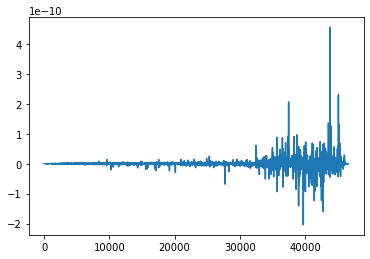

In [11]:
import numpy as np
A = np.load('/home/pm/Documents/PhD/testdata/B.npy')
print(A.shape)
B = np.load('/home/pm/Documents/PhD/testdata/B_old.npy')
print(B.shape)

from matplotlib import pyplot as plt
#plt.plot(A[:-1,0])
#plt.plot(B[:,2])
#plt.plot(A[:-1,3]-B[:,4])
#print(np.tile(B[:,0],(12,1)).T.shape)
print(np.median(np.argmin(abs(A[:,:]-np.tile(B[:,0],(12,1)).T),axis=1)))


#plt.plot(B[:,0])
#plt.plot(A[:,2])
plt.plot(A[:,2]-B[:,0])

(93312, 12)
(93312, 12)
1.0


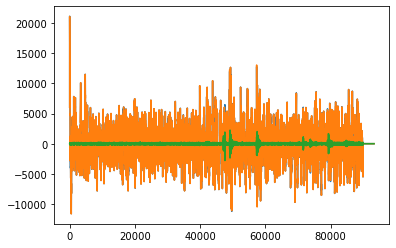

In [16]:
import numpy as np
A = np.load('/home/pm/Documents/PhD/testdata/A.npy')
print(A.shape)
B = np.load('/home/pm/Documents/PhD/testdata/A_old.npy')
print(B.shape)

from matplotlib import pyplot as plt
#plt.plot(A[:-1,0])
#plt.plot(B[:,2])
#plt.plot(A[:-1,3]-B[:,4])
#print(np.tile(B[:,0],(12,1)).T.shape)
print(np.median(np.argmin(abs(A[:,:]-np.tile(B[:,0],(12,1)).T),axis=1)))


plt.plot(B[:,0])
plt.plot(A[:,1])
plt.plot(A[:,1]-B[:,0])

In [165]:
def normalise(data: np.ndarray or list, axis=-1):
    """
    Normalises the provided dataset along the given axis

    :param data: dataset to be normalised
    :type data: np.ndarray
    :param axis: Axis to normalise along, defaults to -1
    :type axis: int, optional
    """
    data = np.asarray(data)
    data = data - np.mean(data, axis, keepdims=True)
    std = np.std(data, axis, keepdims=True)
    # Avoid receiving nans
    std[np.where(std==0)] = 1
    data = data / std
    return data

import numpy as np
a = np.arange(5)+5
normalise(np.tile(a,(4,1)), axis=0)


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [158]:
a = np.arange(5)+5
a = np.vstack((np.zeros_like(a),a))
a = np.tile(a,(4,1))
print(a)
std = np.std(a, axis=1)
print(std)
std[np.where(std==0)] = 1
print(std)


[[0 0 0 0 0]
 [5 6 7 8 9]
 [0 0 0 0 0]
 [5 6 7 8 9]
 [0 0 0 0 0]
 [5 6 7 8 9]
 [0 0 0 0 0]
 [5 6 7 8 9]]
[0.         1.41421356 0.         1.41421356 0.         1.41421356
 0.         1.41421356]
[1.         1.41421356 1.         1.41421356 1.         1.41421356
 1.         1.41421356]
